There is a tree (i.e. a connected, undirected graph with no cycles) consisting of n nodes numbered from 0 to n - 1 and exactly n - 1 edges.

You are given a 0-indexed integer array vals of length n where vals[i] denotes the value of the ith node. You are also given a 2D integer array edges where edges[i] = [ai, bi] denotes that there exists an undirected edge connecting nodes ai and bi.

A good path is a simple path that satisfies the following conditions:

    The starting node and the ending node have the same value.
    All nodes between the starting node and the ending node have values less than or equal to the starting node (i.e. the starting node's value should be the maximum value along the path).

Return the number of distinct good paths.

Note that a path and its reverse are counted as the same path. For example, 0 -> 1 is considered to be the same as 1 -> 0. A single node is also considered as a valid path.

 

Example 1:

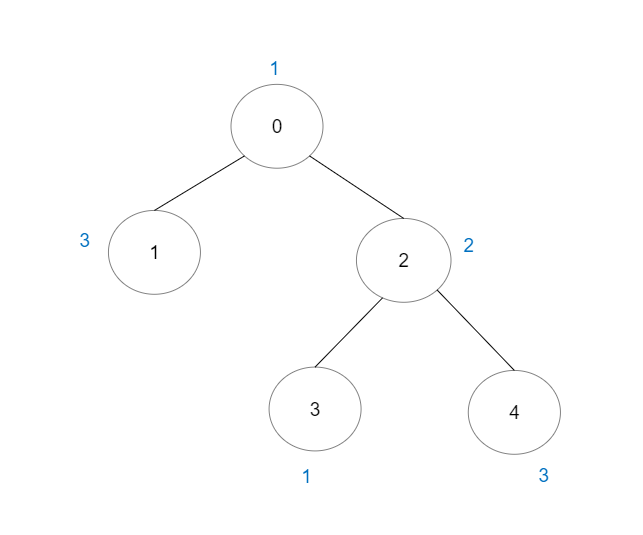

Input: vals = [1,3,2,1,3], edges = [[0,1],[0,2],[2,3],[2,4]]
Output: 6
Explanation: There are 5 good paths consisting of a single node.
There is 1 additional good path: 1 -> 0 -> 2 -> 4.
(The reverse path 4 -> 2 -> 0 -> 1 is treated as the same as 1 -> 0 -> 2 -> 4.)
Note that 0 -> 2 -> 3 is not a good path because vals[2] > vals[0].

Example 2:

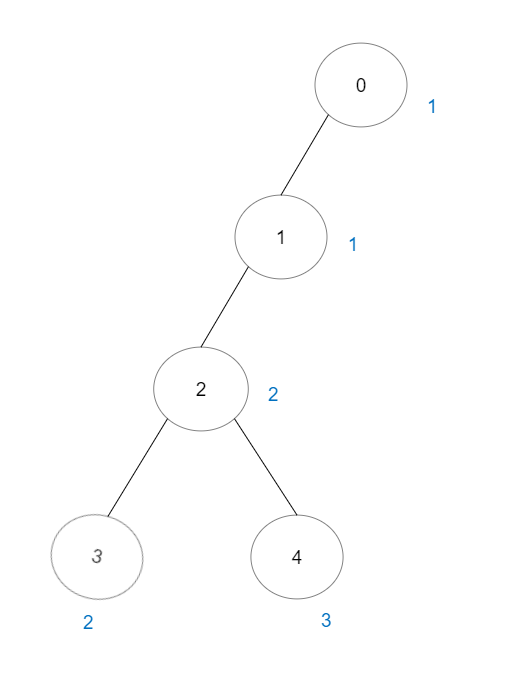

Input: vals = [1,1,2,2,3], edges = [[0,1],[1,2],[2,3],[2,4]]
Output: 7
Explanation: There are 5 good paths consisting of a single node.
There are 2 additional good paths: 0 -> 1 and 2 -> 3.

Example 3:

Input: vals = [1], edges = []
Output: 1
Explanation: The tree consists of only one node, so there is one good path.

 

Constraints:

    n == vals.length
    1 <= n <= 3 * 104
    0 <= vals[i] <= 105
    edges.length == n - 1
    edges[i].length == 2
    0 <= ai, bi < n
    ai != bi
    edges represents a valid tree.



In [ ]:
class Solution:
    def numberOfGoodPaths(self, vals: List[int], edges: List[List[int]]) -> int:
        n = len(vals)
        p = list(range(n))
        count = [Counter({vals[i]: 1}) for i in range(n)]
        edges = sorted((max(vals[i], vals[j]), i, j) for i, j in edges)
        res = n
        
        def find(i):
            if p[i] != i:
                p[i] = find(p[i])
            return p[i]
        
        for val, i, j in edges:
            pi, pj = find(i), find(j)
            res += count[pi][val] * count[pj][val]
            p[pi] = pj
            count[pj][val] += count[pi][val]
        return res